In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

from IPython.display import Image
from matplotlib import pyplot as plt

In [2]:
import os
IMG_FOLDER = 'img'

os.makedirs(IMG_FOLDER, exist_ok=True)

# Simple function

- Сгенерируйте данные для функции $y = x^3$. Возьмите числа от 0 до 99.
- Отобразите данные на графике. Обозначьте кажду точку в виде красного "+"
- Подпишите оси
- Дайте название графику

## Just plot

In [3]:
data = # your code

*Пример*

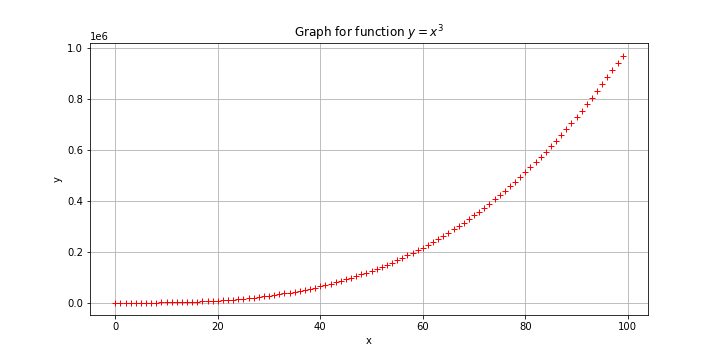

In [4]:
Image(filename=os.path.join(IMG_FOLDER,'task0_1.png'))

*Решение*

In [1]:
# plt.figure(figsize=...)
# your code

# plt.show()

Заметье, что числа на оси y перевелись в "научную нотацию". Как это можно поправить?

## Plot partly with intervals

Представьте что вы сделали модель и предсказали еще 10 точек для вашего графика выше. Вы имеете точные значения и оценки на их вероятные верхние и нижние границы.

Постройте график, где сначала красным цветом будут показываться ваши "тренировочные" данные, а дальше желтым -- "предсказания". Светло-желтым закрасьте области между верхней и нижней границей для каждой точки, подпишите ее как CI в графике

In [6]:
preds_size = 10

preds = np.arange(len(data), len(data) + preds_size) ** 3

all_data = np.concatenate((data, preds))
stds = np.array([np.std(all_data[i - 50: i]) for i in range(len(data), len(data) + preds_size)])

l_bounds = preds - stds
h_bounds = preds + stds

*Пример*

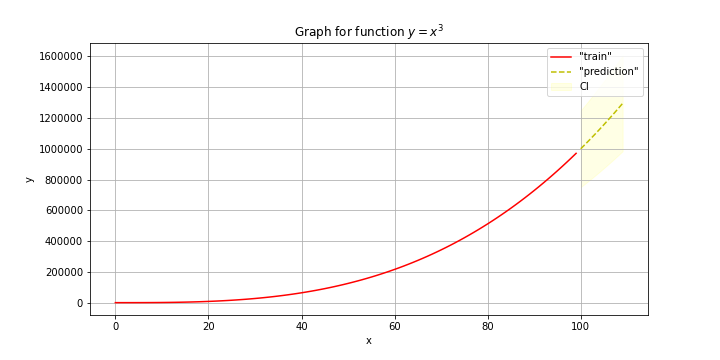

In [9]:
Image(filename=os.path.join(IMG_FOLDER,'task0_2.png'))

*Решение*

In [2]:
# train_range = np.arange(len(data))
# preds_range = np.arange(len(data), len(data) + preds_size)

# your code

# plt.show()

## Using Plotly

**Давайте теперь сделаем интерактивный график в plotly**

https://plotly.com/python/marker-style/#using-a-custom-marker

*Пример*

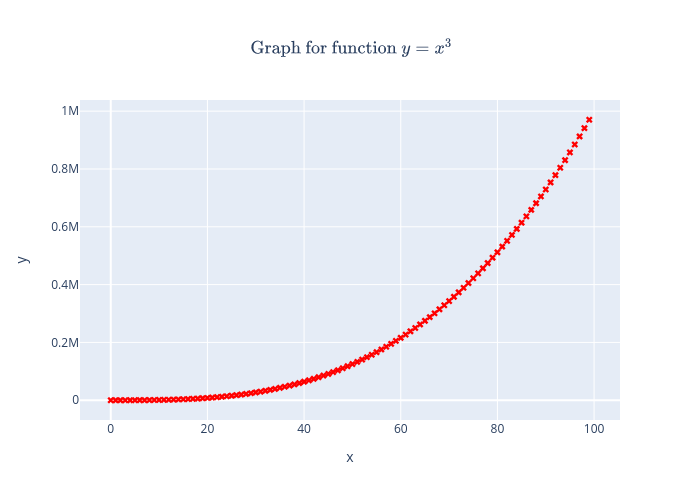

In [54]:
Image(filename=os.path.join(IMG_FOLDER,'task0_1_plotly.png'))

*Решение*

In [4]:
# your code

# plotly_fig = go.Figure(
#     data=go.Scatter(
#         ...
#     ),
# )

# plotly_fig.update_traces(
#     marker=
#     mode=
# )

# plotly_fig.update_layout(
#     title=
#     ...
# )



**Добавим "предикты" с интервалами по аналогии с matplotlib**

*Пример*

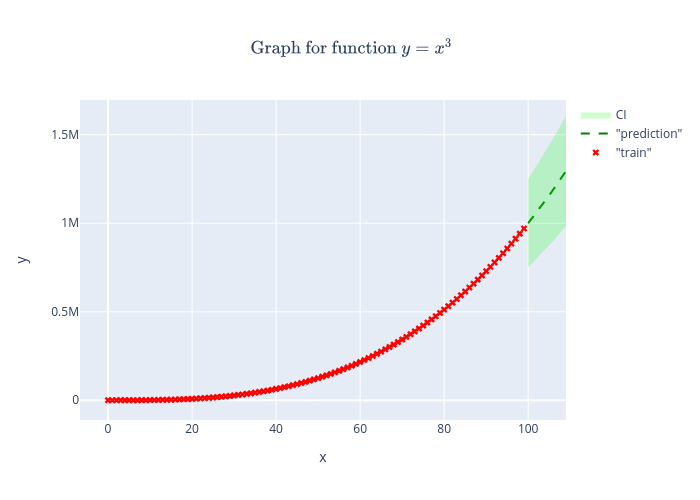

In [48]:
Image(filename=os.path.join(IMG_FOLDER,'task0_2_plotly.png'))

*Решение*

In [13]:
# your code adding dashed line

# plotly_fig.add_trace(
#     go.Scatter(
#            ...
#     )
# )


# your code adding filled area

# plotly_fig.add_trace(
#     go.Scatter(
#          ...
#     )
# )

# plotly_fig.add_trace(
#     go.Scatter(
#           ...
#     )
# )

In [49]:
# plotly_fig.write_image(os.path.join(IMG_FOLDER, 'task0_2_plotly.png'))

# Figure for artificial data. Subplots. Line plot. Scatter plot

In [20]:
np.random.seed(42)

df = pd.DataFrame(data={'column_a':np.random.randint(0, 100, 30),
                        'column_b':np.random.randint(0, 100, 30),
                        'column_c':np.random.randint(0, 100, 30)})
df.head()

,column_a,column_b,column_c
0,51,90,91
1,92,58,59
2,14,41,70
3,71,91,43
4,60,59,7


Постройте два графика в одной большой фигуре. 
Назовите фигуру "Task 1", используйте шрифт размера 20.

- Пошарьте ось x между графиками. Назовите ее "index".

- На первом графике:
    - нарисуйте две линии по данным "column_a", и "column_b";
    - сделайте "легенду" в верхней части графика, обозначьте оранжевым цветом данные из колонки a, синим -- данные из колонки b;
    - дайте название оси y: value;
    - назовите график "Line plots for column_a, column_b"

- На втором графике:
    - покажите зелеными точками данные из третьей колонки;
    - сделайте легенду в правом нижнем углу
    - назовите график "Scatter plot for column_c";

- Сохраните получившийся график в формат .png с названием 'task1_1.png' 


https://matplotlib.org/stable/tutorials/colors/colors.html

*Пример*

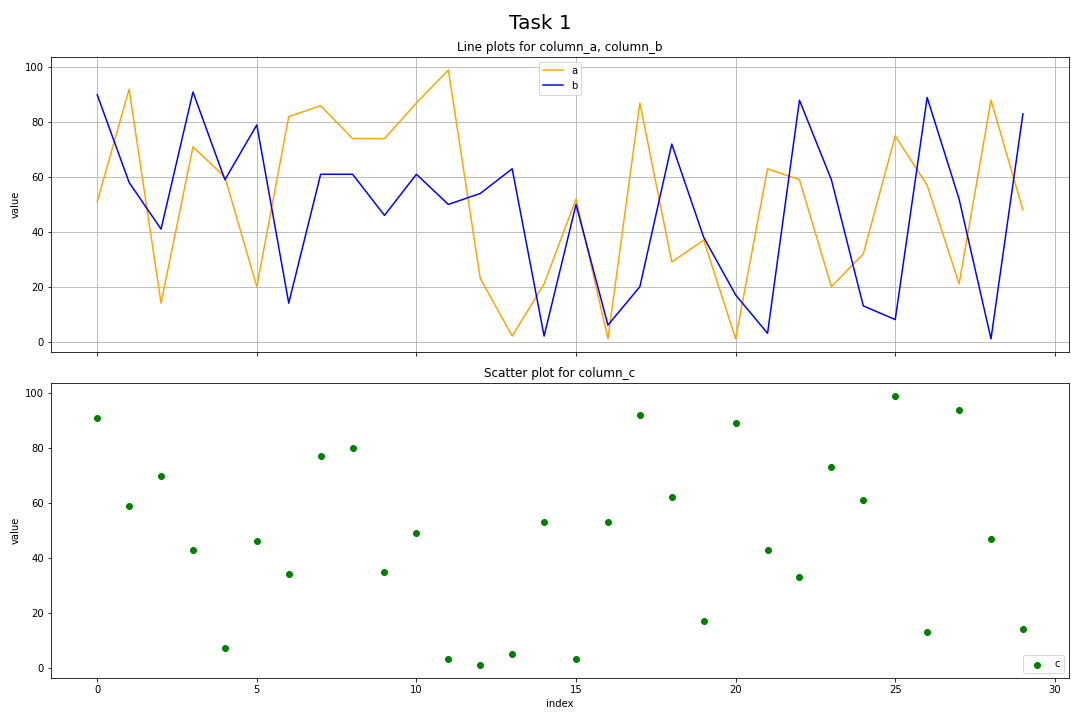

In [47]:
Image(filename=os.path.join(IMG_FOLDER,'task1.png'))

*Решение*

In [5]:
# fig, ax = plt.subplots(..., figsize=...)

# your code

In [6]:
# fig.savefig(os.path.join(IMG_FOLDER, 'task1.png'))

    Для цветов я люблю использовать такую штуку. Заранее назначить набор цветов в глобальную переменную, и "ходить" по ним в графиках. Вот так:
    
```Python
from itertools import cycle

COLORS = cycle(['b','g','r','c','m','y'])  # have different colors in complex plots across the notebook
...
ax.plot(..., color=next(COLORS))
...

```

## Bar plot

Для датафрейма выше постройте bar plots отдельно для данных из колонок a, b, c. Подпишите значения в каждом "столбике" (`ax.bar_label` может помочь)

PS для однотипных операций используйте циклы

In [24]:
from itertools import cycle
COLORS = cycle(['b','g','r','c','m','y'])

*Пример*

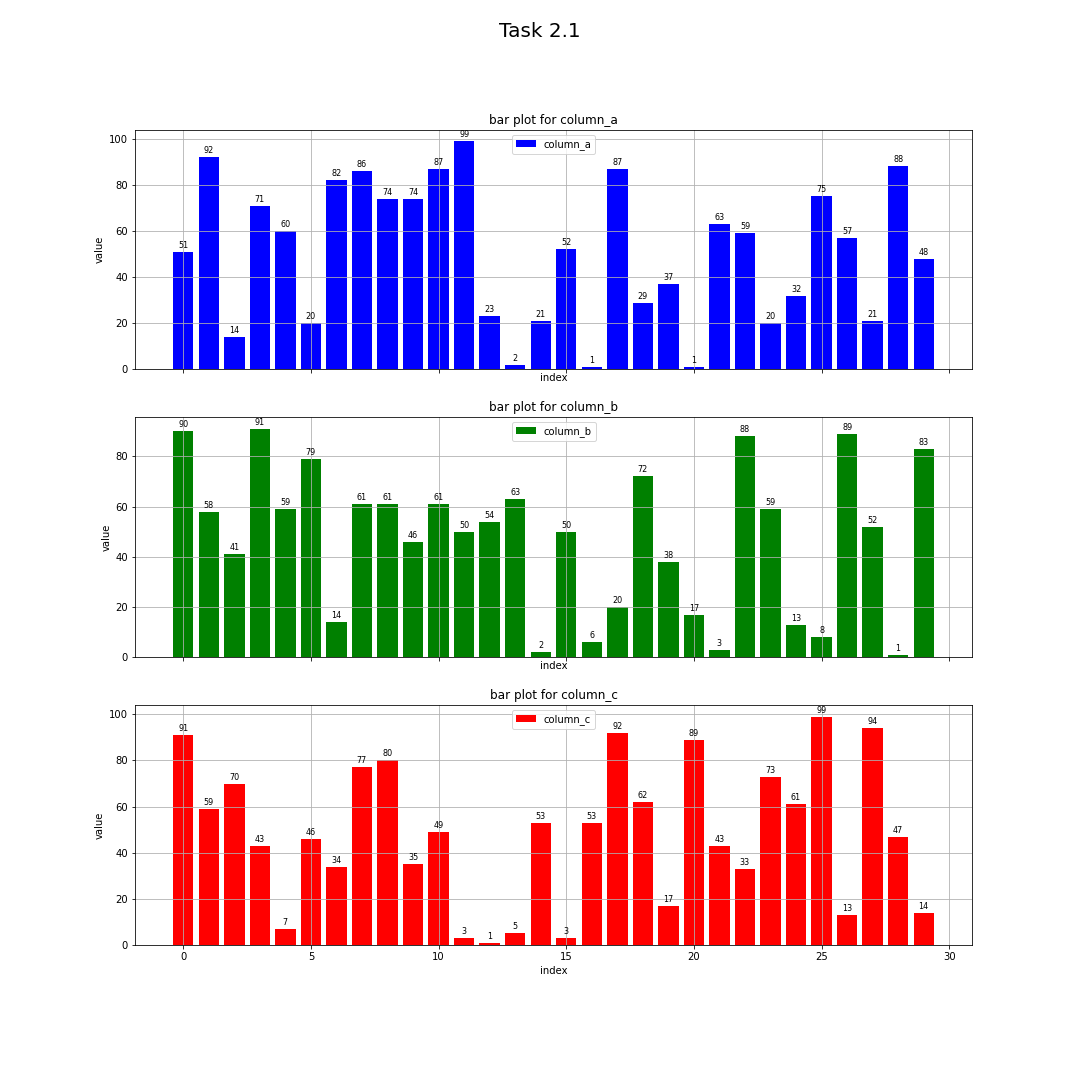

In [46]:
Image(filename=os.path.join(IMG_FOLDER,'task2_1.png'))

*Решение*

In [7]:
# your code

**Также можно использовать df[column].plot от pandas**

In [8]:
# your code

### Using Plotly

*Пример*

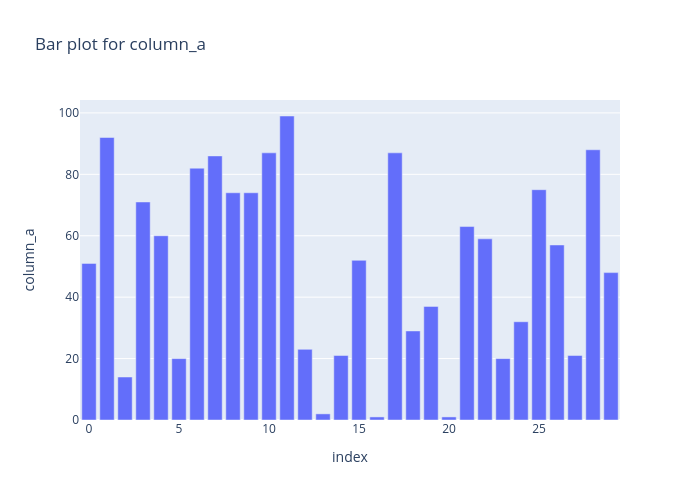

In [44]:
Image(filename=os.path.join(IMG_FOLDER,'task2_1_plotly_1.png'))

*Решение*

In [9]:
# plotly_fig = px.bar(...)
# plotly_fig.show()

**Попробуем отобразить все колонки сразу**

*Пример*

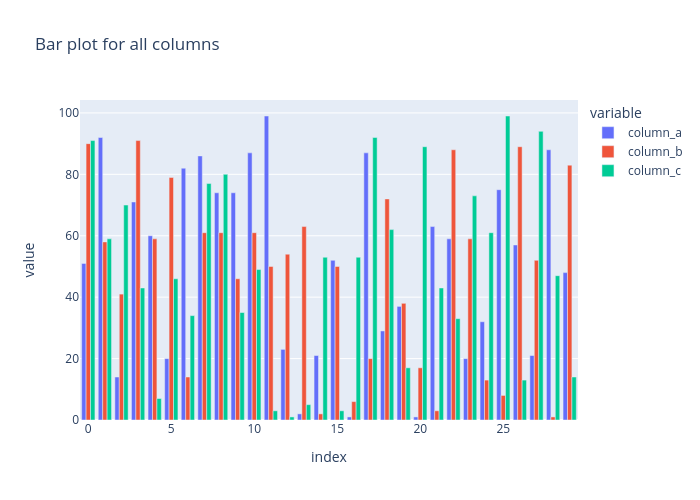

In [43]:
Image(filename=os.path.join(IMG_FOLDER,'task2_1_plotly_2.png'))

*Решение*

In [10]:
# plotly_fig = px.bar(...)
# plotly_fig.show()

## Stacked Bar Plot

**Выделение разных частей в колонках**

Сделайте bar plot по всем колонкам (суммы) и цветами укажите "вклад" каждой колонки

*Пример*

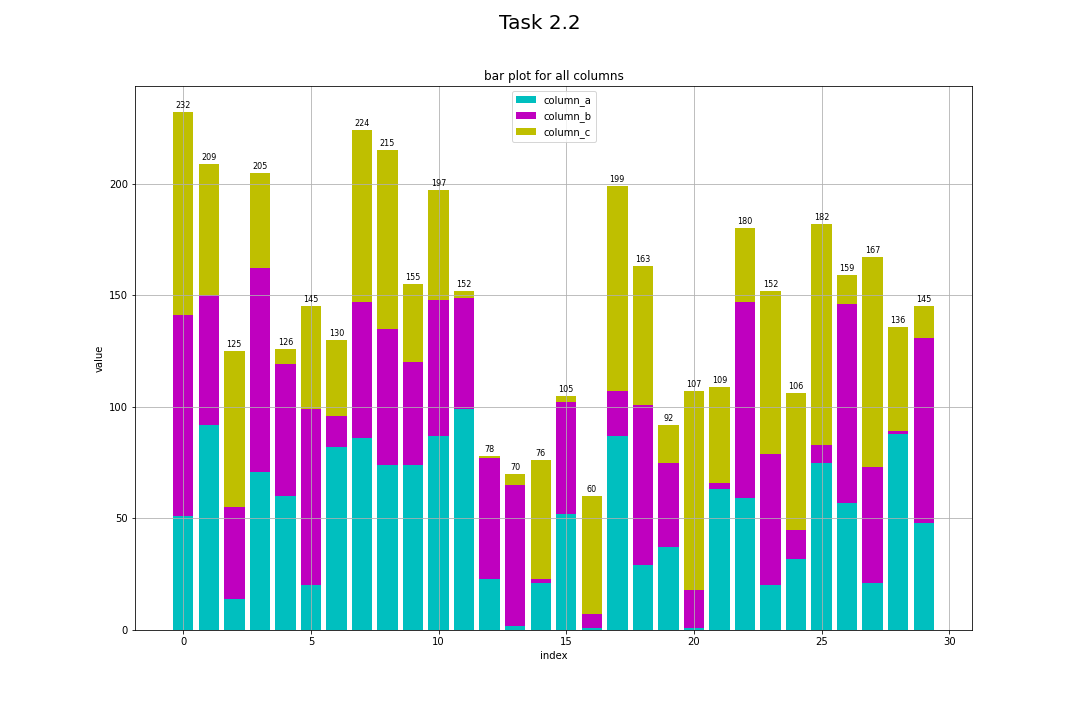

In [41]:
Image(filename=os.path.join(IMG_FOLDER,'task2_2.png'))

*Решение*

In [11]:
# your code

Убедимся, что наши значение похожи на правду

In [34]:
df.sum(1).values

array([232, 209, 125, 205, 126, 145, 130, 224, 215, 155, 197, 152,  78,
        70,  76, 105,  60, 199, 163,  92, 107, 109, 180, 152, 106, 182,
       159, 167, 136, 145])

In [35]:
# fig.savefig(os.path.join(IMG_FOLDER, 'task2_2.png'))

### Using Plotly

*Пример*

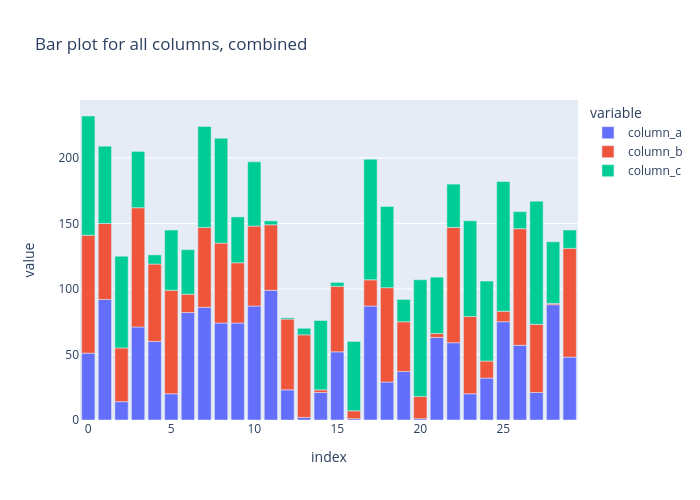

In [39]:
Image(filename=os.path.join(IMG_FOLDER,'task2_2_plotly.png'))

*Решение*

In [12]:
# plotly_fig = px.bar(...)
# plotly_fig.show()

In [40]:
# plotly_fig.write_image(os.path.join(IMG_FOLDER, 'task2_2_plotly.png'))